In [1]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [3]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

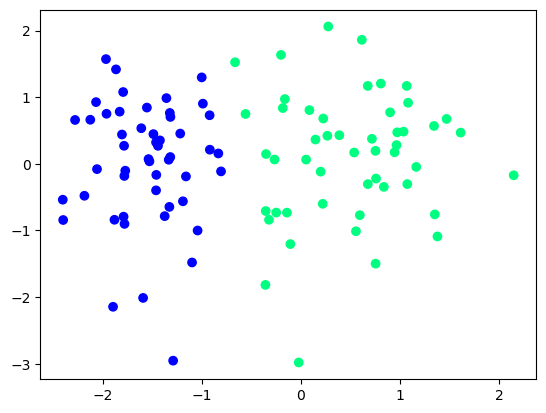

In [6]:
plt.scatter(X[:,0] , X[0:,1], c=y, cmap='winter')

In [9]:
# Perceptron Trick Algo
"""
1. Initialize weights to some random value
1. Add a bias column with value 1.
2. For i in epoch:
    2.1 pick a random x1,y1. 
    2.2 update weights
        wi = w_i1 + (y-y_i)*x_i
"""

'\n1. Add a bias column with value 1.\n2. For i in epoch:\n    2.1 pick a random x1,y1. \n    2.2 update weights\n        wi = w_i1 + (y-y_i)*x_i\n'

In [53]:
import numpy as np
import random
def perceptron_trick(X, y):
    alpha = 0.01
    x = np.insert(X, 0, 1, axis=1) # Add one column (x0 with value 1 for all rows)
    # Initialize A, B, C with random values (1, 1, 1)
    w0,w1,w2=(1,1,1)
    epochs = 100000
    # Get a random point
    for i in range(epochs):
        i = random.randint(0, 99)
        actual_i = y[i]
        x0 = x[i][0]
        x1 = x[i][1]
        x2 = x[i][2]
        pred_i = step((w0*x0)+(w1*x1)+(w2*x2))
        #print(pred_i)
        # update weights
        w0 = w0 + (alpha*(actual_i-pred_i)*x0)
        w1 = w1 + (alpha*(actual_i-pred_i)*x1)
        w2 = w2 + (alpha*(actual_i-pred_i)*x2)
        #print(f"Selected index {str(i)} for current epoch. Weights: W0 {str(w0)}, W1 {str(w1)}, W2 {str(w2)}")
    return w0, w1, w2


def step(value):
    if value > 0:
        return 1 
    else:
        return 0
    
    
w0, w1, w2 = perceptron_trick(X, y)
print(f"intercept: {str(w0)}")
print(f"coeff 1 : {str(w1)}")
print(f"coeff 2 : {str(w2)}")

intercept: 0.94
coeff 1 : 1.2691149761823706
coeff 2 : 0.24515940121705512


In [51]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
intercept_,coef_ = perceptron(X,y)
print(intercept_)
print(coef_)

0.9
[1.32584342 0.21156437]


(-3.0, 2.0)

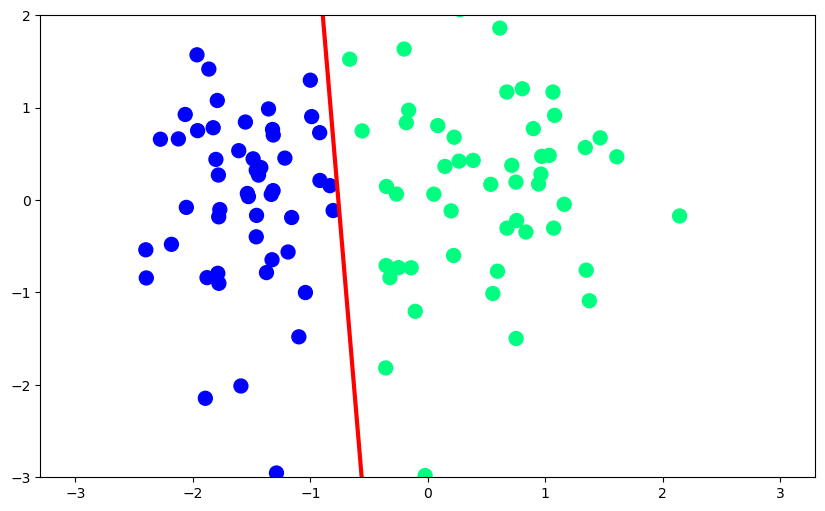

In [44]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
# Ax + By +c =0


In [56]:
m = -(w1/w2)
b = -(w0/w2)

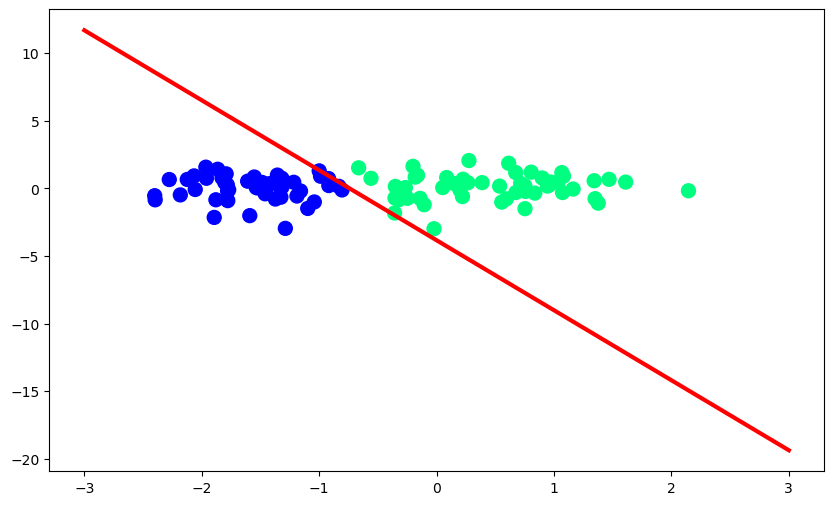

In [57]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [37]:
x_input

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [10]:
import numpy as np

In [11]:
a = np.array([[1, 1], [2, 2], [3, 3]])

In [12]:
a

array([[1, 1],
       [2, 2],
       [3, 3]])

In [21]:
x = np.insert(X, 0, 1, axis=1)

In [22]:
x

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [23]:
import random
for data in range(1000):
    x0 = data[0]
    x1 = data[1]
    x2 = data[2]
    

[ 1.          0.19924745 -0.11697552]
[ 1.         -0.24882029 -0.73115232]
[ 1.        -0.3544904 -0.7081059]
[ 1.         -1.59086506 -2.01199214]
[ 1.         -0.20083951  1.63493163]
[ 1.         -0.83241122  0.15599044]
[ 1.         -1.79207014  1.07782053]
[1.         0.0856607  0.80626713]
[ 1.         -0.55865299  0.74859527]
[ 1.         -1.95974262  0.75152794]
[ 1.         -1.77828947 -0.90114581]
[ 1.         -1.77985853 -0.1815243 ]
[ 1.         -0.02194151 -2.98092432]
[1.         0.80563431 1.20500136]
[ 1.         -1.82701214  0.78302407]
[1.         0.38730728 0.42968688]
[ 1.         -0.14108668 -0.73229726]
[ 1.         -1.87955941 -0.83930476]
[ 1.         -0.18232911  0.83727062]
[ 1.         -1.77059533 -0.10255323]
[ 1.         -2.27658028  0.65867001]
[ 1.         -2.06519502  0.92649819]
[ 1.         -1.31690551  0.10216193]
[1.         1.61043259 0.46886454]
[ 1.         -1.21650394  0.45432938]
[1.        0.6139723 1.8613386]
[ 1.         -1.78760957 -0.79255

In [20]:
x

array([[5, 1, 1],
       [5, 2, 2],
       [5, 3, 3]])

In [16]:
x

array([1, 5, 1, 2, 2, 3, 3])